## 1.Veriyi Yükleme Ve Genel Bilgiler

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv(r'C:\Users\Harun\Desktop\MachineLearningProjects\PredictCarPrice\audiCar.csv')

In [5]:
df.head(3)

,index,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),href,PPY,MileageRank,PriceRank,PPYRank,Score
0,0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,https://www.autotrader.co.uk/car-details/20221...,2499.166667,215,163,340,718
1,4,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,https://www.autotrader.co.uk/car-details/20221...,2688.750000,222,330,276,828
2,7,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,https://www.autotrader.co.uk/car-details/20221...,3599.666667,221,327,94,642


## 2.Anlamsız Sutunları Düşürme

In [6]:
df=df.drop(columns=['index','href','MileageRank', 'PriceRank' ,'PPYRank','Score'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    object 
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel              471 non-null    object 
 7   Number_of_Owners  471 non-null    int64  
 8   Price(£)          471 non-null    float64
 9   PPY               471 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 36.9+ KB


## 3.Sutunların Isimlerini Turkcelestirme

In [7]:
df.columns=["yil", "kasa", "mil", "motor", "ps", "vites", "yakit", "sahip", "fiyat","ppy"]

In [8]:
df.head(3)

,yil,kasa,mil,motor,ps,vites,yakit,sahip,fiyat,ppy
0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,3599.666667


## 4.Motor Sutununu Sayısal (Numeric) Hale Getirme 

In [9]:
df['motor']=df['motor'].str.replace("L"," ")

In [12]:
df['motor']=pd.to_numeric(df['motor'])

In [13]:
df.head(3)

,yil,kasa,mil,motor,ps,vites,yakit,sahip,fiyat,ppy
0,2018.0,Hatchback,44000.0,1.6,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4,123.274162,Manual,Petrol,2,10799.0,3599.666667


## 5. Kategorik Verilerin Kodlanması

In [22]:
nmdf=pd.get_dummies(df,['kasa','vites','yakit'],drop_first=True)

In [23]:
nmdf.head(3)

,yil,mil,motor,ps,sahip,fiyat,ppy,vites_Manual,yakit_Petrol
0,2018.0,44000.0,1.6,114.398422,1,14995.0,2499.166667,True,False
1,2016.0,42596.0,1.0,93.688363,3,10755.0,2688.750000,True,True
2,2015.0,42700.0,1.4,123.274162,2,10799.0,3599.666667,True,True


## 6. Bağımlı ve Bağımsız Değişkenlerin Ayrılması

In [32]:
y=nmdf['fiyat']
x=nmdf.drop('fiyat',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=42)


## 7. Linear Regression Modeli ile Tahmin

In [33]:
linear_model=LinearRegression()
model=linear_model.fit(x_train,y_train)

In [34]:
scorea=model.score(x_test,y_test)
print(scorea)

0.9631099340162026


In [35]:
model.predict([[2018,44000,1.6,114,1,2499,1,0]]) # 2018 yıl ,mil 44000 olan, motoru 1.6 olan ,114 ps değerine sahip olan , ilk sahibinden , ppy değeri 2499 olan , vitesi manuel olan , yatırı benzin olan 

c:\Users\Harun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15210.86499599])

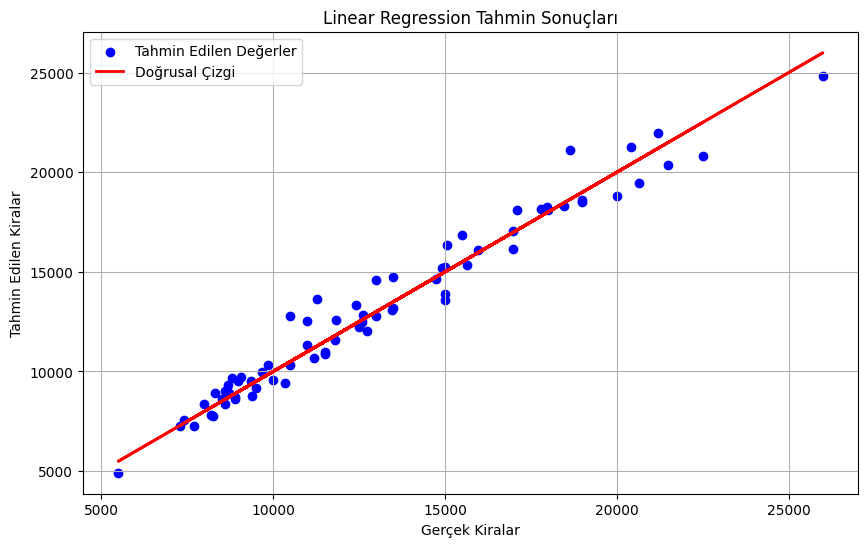

In [36]:
import matplotlib.pyplot as plt

# Tahmin yap
y_pred = model.predict(x_test)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahmin Edilen Değerler')  # Gerçek vs Tahmin
plt.plot(y_test, y_test, color='red', linewidth=2, label='Doğrusal Çizgi')  # Mükemmel Doğrusal Çizgi
plt.xlabel('Gerçek Kiralar')
plt.ylabel('Tahmin Edilen Kiralar')
plt.title('Linear Regression Tahmin Sonuçları')
plt.legend()
plt.grid(True)
plt.show()
